# Step1:Reading and Understanding Data

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import  statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score


import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing dataset
bike_sharing=pd.read_csv('day.csv')
bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
#Looking for the number of rows and columns in the dataset
bike_sharing.shape

(730, 16)

In [4]:
#Looking for the data types, Number of non-null values
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
bike_sharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
#Checking for the prsence of null values 
bike_sharing.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

We don't have any null values present in the data

### Dropping columns which are not relevant for analysis

In [7]:
#Since instant is an altenative to index, we can drop it
bike_sharing.drop(['instant'],axis=1,inplace=True)


In [8]:
#We can drop casual and registered columns from the data set as we have the sum of these both in the cnt
bike_sharing.drop(['casual','registered'],axis=1,inplace=True)

In [9]:
#We can also delete the dteday column as we can extract the information from yr,mnth,weekday columns.But before doing that
#we shall derive a new column days_old which indicates how old is the bsuiness for further analysis.


bike_sharing['days_old'] = (pd.to_datetime(bike_sharing['dteday'],format= '%d-%m-%Y') 
                            - pd.to_datetime('01-01-2018',format= '%d-%m-%Y')).dt.days
bike_sharing.drop(['dteday'],axis=1,inplace=True)

In [10]:
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985,0
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801,1
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,2
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,3
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,4


### Examinig Outliers

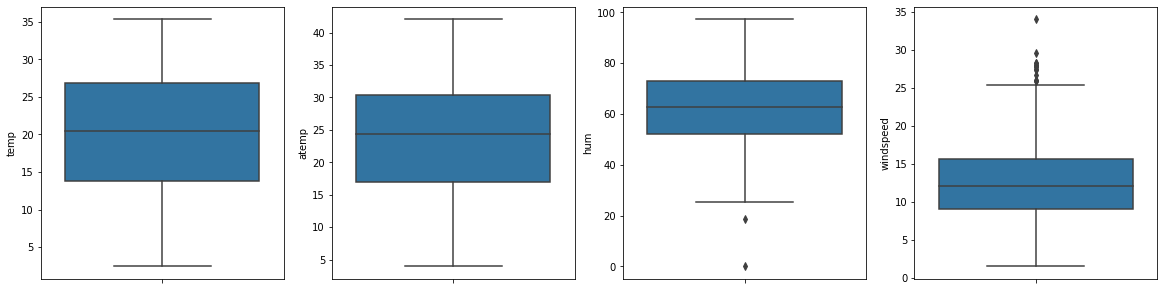

In [11]:
cols=['temp','atemp','hum','windspeed']
plt.figure(figsize=(20,5))
i=1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=bike_sharing)
    i+=1

From the above box plots we can observe that there are no outliers present in the temp,atemp columns,and only a little 
percent of outliers are present  in humidity and windspeed which can be ignored.

### Step 2: Visualizing data

Before visulaizing the data, let us first convert the categorical varibles into their original meanings 

In [12]:
#Renaming column names for better readbility
bike_sharing.rename(columns={'yr':'year','mnth':'month','hum':'humidity','cnt':'count'},inplace=True)

In [13]:
#converting season into categorical string variables.
bike_sharing.season=bike_sharing.season.replace({1:'spring',2:'summer',3:'fall',4:'winter'})
bike_sharing.weathersit=bike_sharing.weathersit.replace({1:'Clear',2:'Mist',3:'Light_snowrain',4:'Heavy_rain'})
bike_sharing.month = bike_sharing.month.replace({1: 'Jan',2: 'Feb',3: 'Mar',4: 'Apr',5: 'may',6: 'Jun',
                  7: 'Jul',8: 'Aug',9: 'Sept',10: 'Oct',11: 'Nov',12: 'Dec'})

bike_sharing.weekday = bike_sharing.weekday.replace({0: 'Sun',1: 'Mon',2: 'Tue',3: 'Wed',4: 'Thu',5: 'Fri',6: 'Sat'})
bike_sharing.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count,days_old
0,spring,0,Jan,0,Mon,1,Mist,14.110847,18.18125,80.5833,10.749882,985,0
1,spring,0,Jan,0,Tue,1,Mist,14.902598,17.68695,69.6087,16.652113,801,1
2,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,2
3,spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,3
4,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,4


Let's us now start visualizing the data

In [14]:
bike_sharing.days_old

0        0
1        1
2        2
3        3
4        4
      ... 
725    725
726    726
727    727
728    728
729    729
Name: days_old, Length: 730, dtype: int64

<Figure size 1440x720 with 0 Axes>

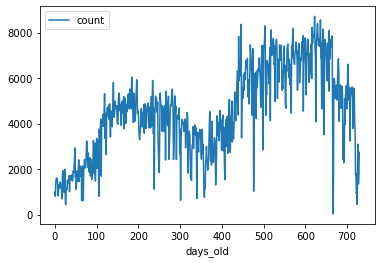

In [15]:
#Let us first confirm whether there is a decline in the count or not 
plt.figure(figsize=(20,10))
bike_sharing.plot.line(x='days_old', y='count')
plt.show()

There is a clear decline in the trned of count.

<Figure size 720x1440 with 0 Axes>

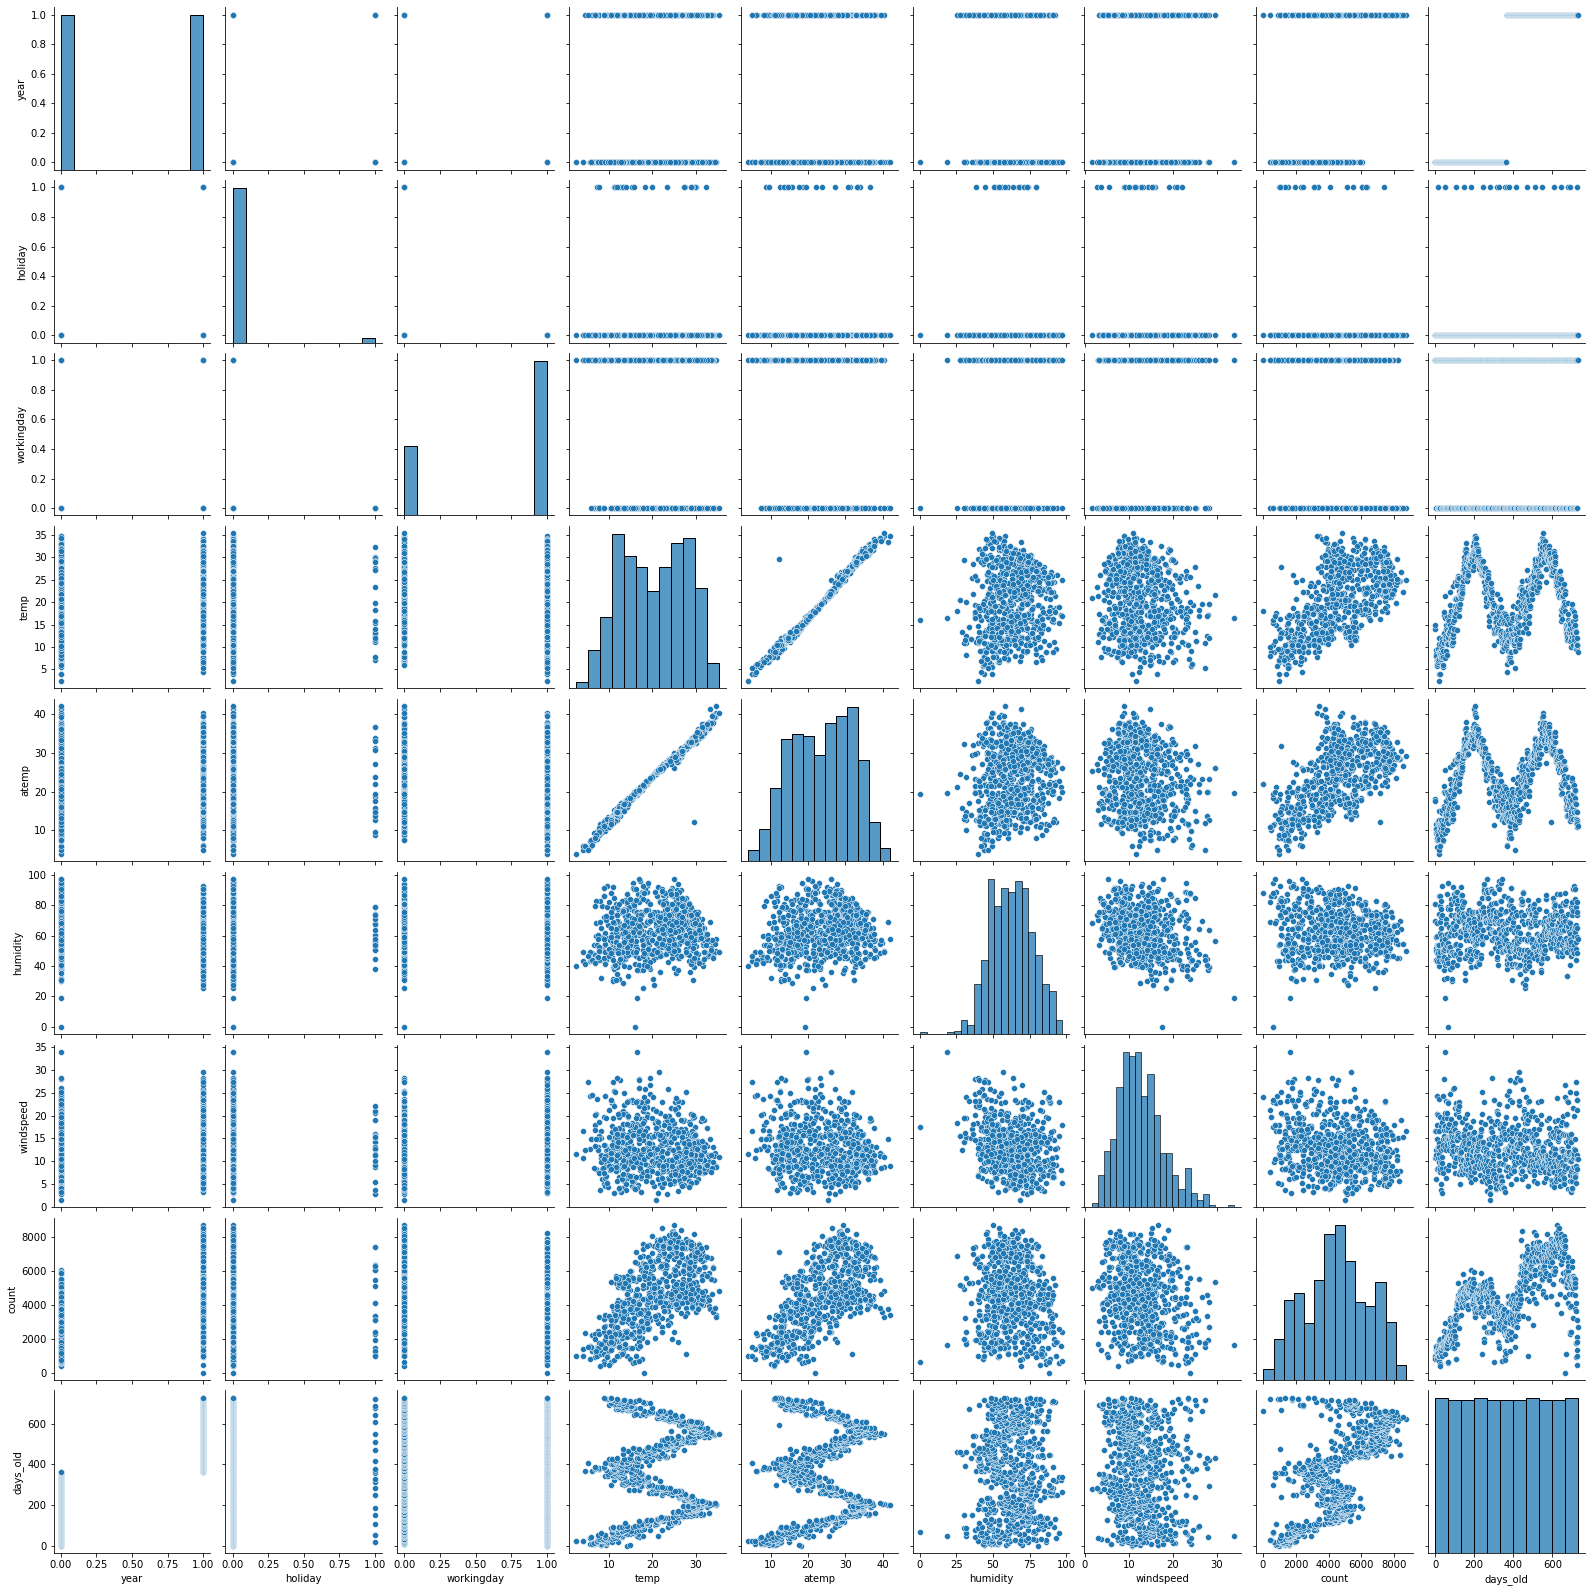

In [16]:
plt.figure(figsize=(10,20))
sns.pairplot(bike_sharing)
plt.show()

1.From the pairplots, we can observe that the temp  and atemp have  the highest corelation with the target variable count

2.temp and atemp are highly co-related with each other.

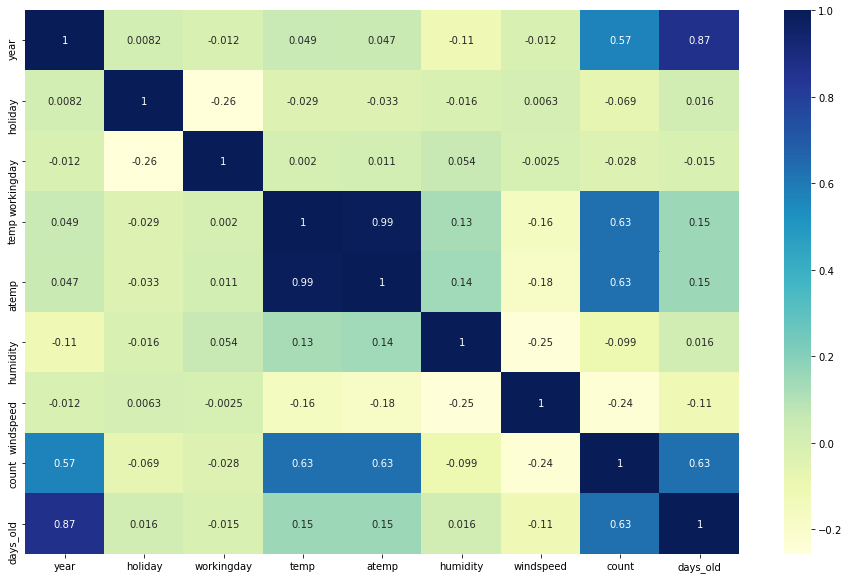

In [17]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (16, 10))
sns.heatmap(data=bike_sharing.corr(),cmap='YlGnBu',annot=True)
plt.show()

From the heatmap,we can observe that there is high correlation betweeen temp-atemp, year-days_old among the independent variables whereas atemp and temp have the highest positive correlation with count

#### Visualizing categorical variables

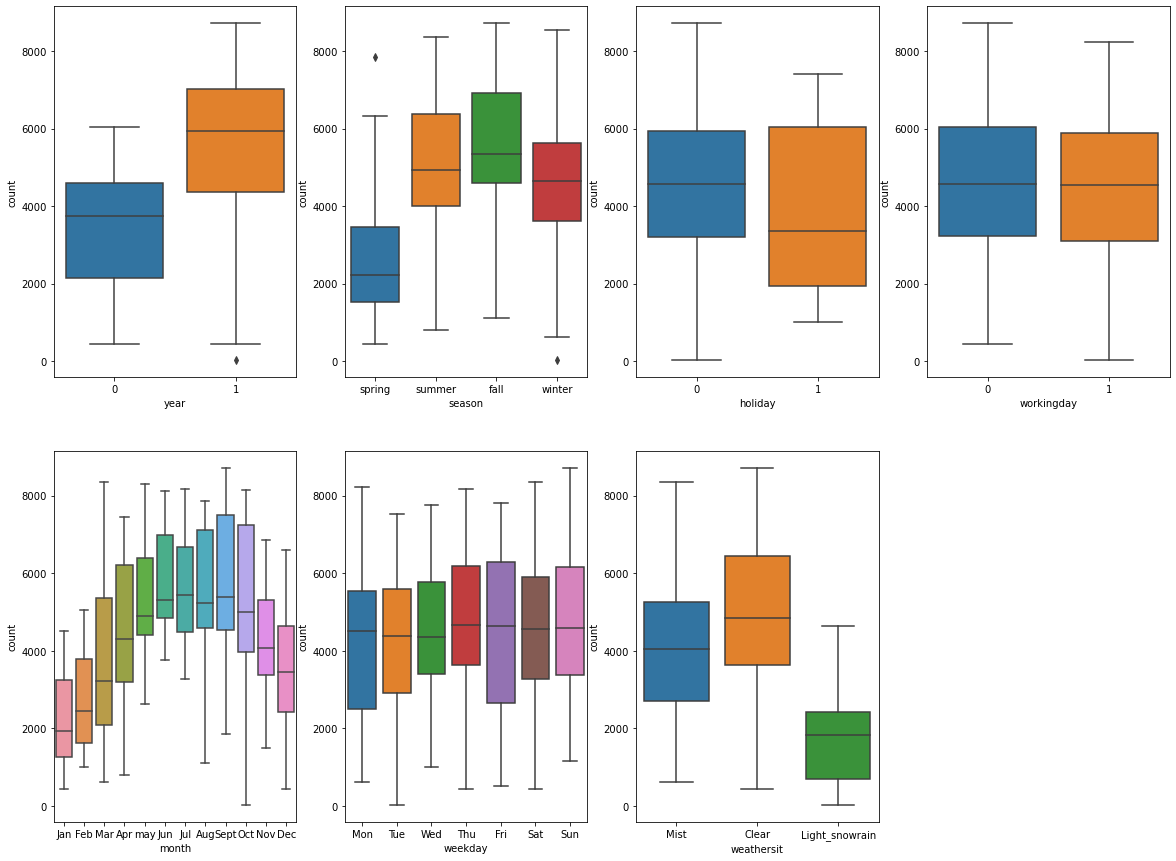

In [18]:
#Let us know the categorical varibles vs the dependent variable cnt.
plt.figure(figsize=(20, 15))
plt.subplot(2,4,1)
sns.boxplot(x = 'year', y = 'count', data =bike_sharing)
plt.subplot(2,4,2)
sns.boxplot(x = 'season', y = 'count', data =bike_sharing)
plt.subplot(2,4,3)
sns.boxplot(x = 'holiday', y = 'count', data =bike_sharing)
plt.subplot(2,4,4)
sns.boxplot(x = 'workingday', y = 'count', data =bike_sharing)
plt.subplot(2,4,5)
sns.boxplot(x = 'month', y = 'count', data =bike_sharing)
plt.subplot(2,4,6)
sns.boxplot(x = 'weekday', y = 'count', data = bike_sharing)
plt.subplot(2,4,7)
sns.boxplot(x='weathersit',y='count',data=bike_sharing)
plt.show()


Inferences:<br>
1.High demand for rental bikes is seen in fall season.<br>
2.The count is more when the weather is clear.<br>
3.The count is very low in the starting months of the year i.e in January and February months.<br>
4.There is only a slight increase in count when it is not a working day.<br>
5.The demand for rental bikes is observed  more on Sundays and Mondays.<br>

### Preparing Dataset

In [19]:
#Let us create dummies for the categorical variables 
cols=['season','weathersit','month','weekday']
#Dropping the first columns as (p-1) dummies can explain p categories.
binary_df=pd.get_dummies(bike_sharing[cols],drop_first=True)
binary_df.head()

,season_spring,season_summer,season_winter,weathersit_Light_snowrain,weathersit_Mist,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,...,month_Nov,month_Oct,month_Sept,month_may,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed
0,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
bike_sharing=pd.concat([bike_sharing,binary_df],axis=1)
bike_sharing.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,...,month_Nov,month_Oct,month_Sept,month_may,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed
0,spring,0,Jan,0,Mon,1,Mist,14.110847,18.18125,80.5833,...,0,0,0,0,1,0,0,0,0,0
1,spring,0,Jan,0,Tue,1,Mist,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,0,0,1,0
2,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,0,0,1
3,spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,0,1,0,0
4,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [21]:
#Dropping the redundant categorical columns as we already have created dummy columns for the categorical values of each column
bike_sharing.drop(columns=['season','month','weekday','weathersit'],axis=1,inplace=True)


In [22]:
bike_sharing.shape

(730, 31)

### Dividing the data set into train and test for Model building and Testing

In [23]:
train_data,test_data=train_test_split(bike_sharing,train_size=0.70,test_size=0.30,random_state=100)

In [24]:
train_data.shape

(510, 31)

In [25]:
test_data.shape

(219, 31)

### Rescaling features

Let us rescale the numerical features so that all the numerical columns will be on the same scale which would then help us in analyzing the coefficents during the model evaluation

In [26]:
numerical_cols=['temp','atemp','windspeed','humidity','count','days_old']
scaler=MinMaxScaler()
train_data[numerical_cols]=scaler.fit_transform(train_data[numerical_cols])

In [27]:
train_data.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,days_old,season_spring,...,month_Nov,month_Oct,month_Sept,month_may,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0.896978,0,...,0,1,0,0,0,0,0,0,0,1
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0.791209,0,...,0,0,0,0,0,0,0,0,0,1
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0.585165,1,...,0,0,0,0,0,0,1,0,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1.000000,1,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0.662088,0,...,0,0,0,0,0,0,1,0,0,0


In [28]:
train_data.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,days_old,season_spring,...,month_Nov,month_Oct,month_Sept,month_may,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620,0.505414,0.243137,...,0.086275,0.086275,0.080392,0.084314,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294
std,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593,0.288281,0.429398,...,0.281045,0.281045,0.272166,0.278131,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.255838,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.510989,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.759272,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X and Y sets for the model building

In [29]:
y_train=train_data.pop('count')


In [30]:
X_train=train_data

In [31]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: count, dtype: float64

In [32]:
X_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,days_old,season_spring,season_summer,...,month_Nov,month_Oct,month_Sept,month_may,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.896978,0,0,...,0,1,0,0,0,0,0,0,0,1
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.791209,0,0,...,0,0,0,0,0,0,0,0,0,1
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.585165,1,0,...,0,0,0,0,0,0,1,0,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,1.000000,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.662088,0,1,...,0,0,0,0,0,0,1,0,0,0


We have 30 predictor variables and one dependent varible. Using forward/backward stepwise selection approach for feature selection will be time consuming.So let us use the combination of Automated approach(i.e by RFE) and the manual appraoch of feature selections.

### Building the Model using RFE

In [33]:
lm=LinearRegression()
lm.fit(X_train,y_train)

#Running RFE with output number of variables equal to 15.
rfe=RFE(lm,n_features_to_select=15)
rfe=rfe.fit(X_train,y_train)

In [34]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('days_old', False, 12),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('weathersit_Light_snowrain', True, 1),
 ('weathersit_Mist', True, 1),
 ('month_Aug', False, 10),
 ('month_Dec', True, 1),
 ('month_Feb', False, 2),
 ('month_Jan', True, 1),
 ('month_Jul', True, 1),
 ('month_Jun', False, 14),
 ('month_Mar', False, 16),
 ('month_Nov', True, 1),
 ('month_Oct', False, 13),
 ('month_Sept', True, 1),
 ('month_may', False, 7),
 ('weekday_Mon', False, 9),
 ('weekday_Sat', False, 4),
 ('weekday_Sun', False, 5),
 ('weekday_Thu', False, 15),
 ('weekday_Tue', False, 8),
 ('weekday_Wed', False, 11)]

In [35]:
#Columns supported by RFE
col=X_train.columns[rfe.support_]
col

Index(['year', 'holiday', 'temp', 'humidity', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'weathersit_Light_snowrain',
       'weathersit_Mist', 'month_Dec', 'month_Jan', 'month_Jul', 'month_Nov',
       'month_Sept'],
      dtype='object')

In [36]:
#Columns not supported by RFE
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'days_old', 'month_Aug', 'month_Feb',
       'month_Jun', 'month_Mar', 'month_Oct', 'month_may', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thu', 'weekday_Tue',
       'weekday_Wed'],
      dtype='object')

Let us define functions to create models using statsmodel and a function to calculate VIF

In [37]:
#Function to create model using statsmodel
def build_model(cols):
    X_train_sm=sm.add_constant(X_train[cols])
    lm=sm.OLS(y_train,X_train_sm).fit()
    print(lm.summary())
    return lm
    

In [38]:
#function to calculate VIF to handle multicollinearity
def calculate_VIF(cols):
    df=X_train[cols]
    vif=pd.DataFrame()
    vif['Features']=df.columns
    vif['VIF']=[variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    vif['VIF']=round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

#### Model 1

In [39]:
#let us start by considering all the features supported by rfe
cols=X_train.columns[rfe.support_]
build_model(cols)
calculate_VIF(cols)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Sun, 08 May 2022   Prob (F-statistic):          3.34e-189
Time:                        19:59:35   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

From the statistics summary,we can obsevre that the p-values of all the rfe supported varibles is less than 0.05(indicating all the features introduced are significant).
But the variance inflation factor for humidity and temp is very high(indicating high collinearity between the predictor variables)

In [40]:
#As humidity has high inflation factor,we shall drop it
cols=[ x for x in cols if x!='humidity']
print(cols)
calculate_VIF(cols)

['year', 'holiday', 'temp', 'windspeed', 'season_spring', 'season_summer', 'season_winter', 'weathersit_Light_snowrain', 'weathersit_Mist', 'month_Dec', 'month_Jan', 'month_Jul', 'month_Nov', 'month_Sept']
                     Features   VIF
2                        temp  5.17
3                   windspeed  4.67
6               season_winter  2.94
4               season_spring  2.89
5               season_summer  2.23
0                        year  2.07
12                  month_Nov  1.80
10                  month_Jan  1.66
11                  month_Jul  1.59
8             weathersit_Mist  1.56
9                   month_Dec  1.46
13                 month_Sept  1.35
7   weathersit_Light_snowrain  1.09
1                     holiday  1.06


### Model 2-( after dropping humidity)

In [41]:
build_model(cols)
calculate_VIF(cols)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Sun, 08 May 2022   Prob (F-statistic):          1.57e-186
Time:                        19:59:35   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

We shall drop month_Nov as it has high p value and negative correlation.(We are not dropping season_summer
as of now even though it has p-value higher than month_Nov becuse of positive correlation with count and shall drop it  after further analysis)

In [42]:
cols=[ x for x in cols if x!='month_Nov']
print(cols)
calculate_VIF(cols)

['year', 'holiday', 'temp', 'windspeed', 'season_spring', 'season_summer', 'season_winter', 'weathersit_Light_snowrain', 'weathersit_Mist', 'month_Dec', 'month_Jan', 'month_Jul', 'month_Sept']
                     Features   VIF
2                        temp  5.14
3                   windspeed  4.62
4               season_spring  2.89
5               season_summer  2.23
0                        year  2.07
6               season_winter  2.06
10                  month_Jan  1.65
11                  month_Jul  1.59
8             weathersit_Mist  1.56
12                 month_Sept  1.34
9                   month_Dec  1.29
7   weathersit_Light_snowrain  1.08
1                     holiday  1.04


### Model-3(after dropping month_Nov)

In [43]:
build_model(cols)
calculate_VIF(cols)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.8
Date:                Sun, 08 May 2022   Prob (F-statistic):          1.20e-186
Time:                        19:59:36   Log-Likelihood:                 503.13
No. Observations:                 510   AIC:                            -978.3
Df Residuals:                     496   BIC:                            -919.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

We can drop month_Dec has high p value

In [44]:
cols=[ x for x in cols if x!='month_Dec']
print(cols)
calculate_VIF(cols)

['year', 'holiday', 'temp', 'windspeed', 'season_spring', 'season_summer', 'season_winter', 'weathersit_Light_snowrain', 'weathersit_Mist', 'month_Jan', 'month_Jul', 'month_Sept']
                     Features   VIF
2                        temp  5.13
3                   windspeed  4.61
4               season_spring  2.75
5               season_summer  2.22
0                        year  2.07
6               season_winter  1.79
9                   month_Jan  1.61
10                  month_Jul  1.59
8             weathersit_Mist  1.56
11                 month_Sept  1.34
7   weathersit_Light_snowrain  1.08
1                     holiday  1.04


### Model 4 (after dropping month_Dec)

In [45]:
build_model(cols)
calculate_VIF(cols)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     213.1
Date:                Sun, 08 May 2022   Prob (F-statistic):          3.97e-187
Time:                        19:59:36   Log-Likelihood:                 501.48
No. Observations:                 510   AIC:                            -977.0
Df Residuals:                     497   BIC:                            -921.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [46]:
# We can drop month_Jan variable as it has high p-value
cols=[ x for x in cols if x!='month_Jan']
print(cols)
calculate_VIF(cols)

['year', 'holiday', 'temp', 'windspeed', 'season_spring', 'season_summer', 'season_winter', 'weathersit_Light_snowrain', 'weathersit_Mist', 'month_Jul', 'month_Sept']
                     Features   VIF
2                        temp  5.09
3                   windspeed  4.60
5               season_summer  2.21
4               season_spring  2.08
0                        year  2.07
6               season_winter  1.79
9                   month_Jul  1.58
8             weathersit_Mist  1.55
10                 month_Sept  1.34
7   weathersit_Light_snowrain  1.08
1                     holiday  1.04


### Model 5(after dropping month_Jan)

In [47]:
build_model(cols)
calculate_VIF(cols)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.4
Date:                Sun, 08 May 2022   Prob (F-statistic):          2.40e-187
Time:                        19:59:36   Log-Likelihood:                 499.17
No. Observations:                 510   AIC:                            -974.3
Df Residuals:                     498   BIC:                            -923.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [48]:
# We can drop month_Jul variable as it has high p-value when compared to others
cols=[x for x in cols if x!='month_Jul']
print(cols)
calculate_VIF(cols)

['year', 'holiday', 'temp', 'windspeed', 'season_spring', 'season_summer', 'season_winter', 'weathersit_Light_snowrain', 'weathersit_Mist', 'month_Sept']
                    Features   VIF
3                  windspeed  4.59
2                       temp  3.84
0                       year  2.07
4              season_spring  1.99
5              season_summer  1.89
6              season_winter  1.63
8            weathersit_Mist  1.54
9                 month_Sept  1.23
7  weathersit_Light_snowrain  1.08
1                    holiday  1.04


### Model 6(after dropping month_Jul)

In [49]:
build_model(cols)
calculate_VIF(cols)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     249.2
Date:                Sun, 08 May 2022   Prob (F-statistic):          7.36e-187
Time:                        19:59:36   Log-Likelihood:                 495.16
No. Observations:                 510   AIC:                            -968.3
Df Residuals:                     499   BIC:                            -921.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

VIF for this model varaibles seem to be good as all the VIF values are below 5

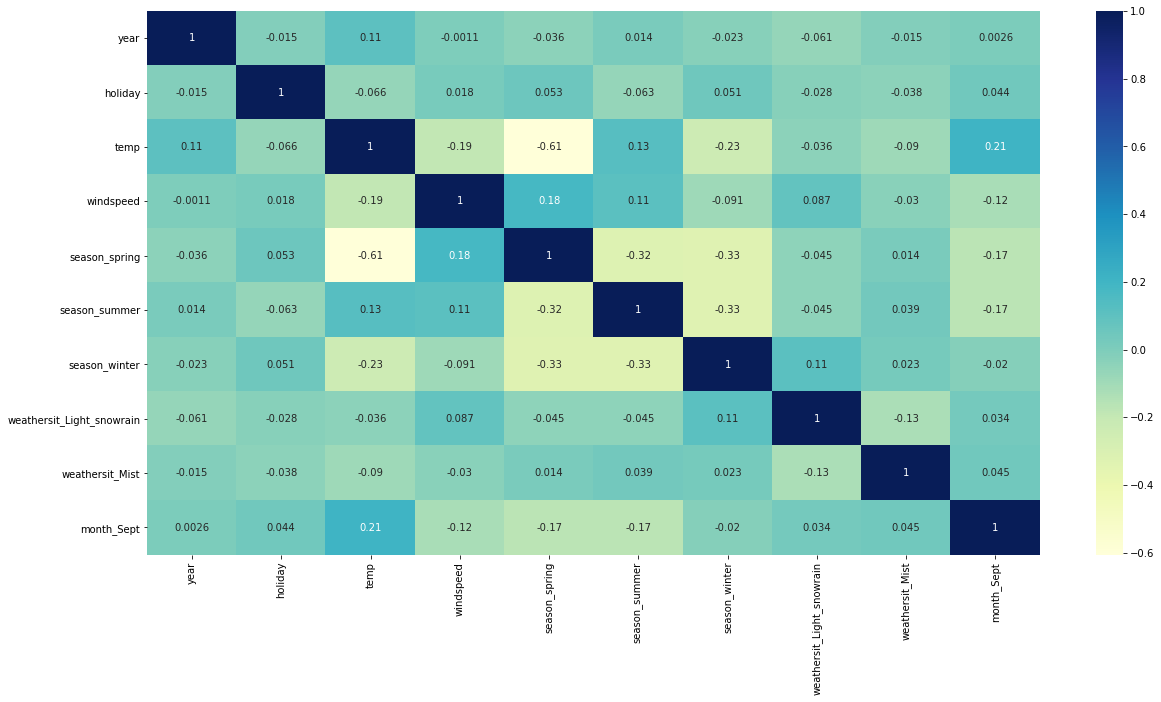

In [50]:
plt.figure(figsize=(20,10))
sns.heatmap(X_train[cols].corr(),annot=True,cmap='YlGnBu')
plt.show()

In [51]:
#dropping windspeed as it has high correlation with season_spring
cols=[x for x in cols if x!='windspeed']
print(cols)
calculate_VIF(cols)

['year', 'holiday', 'temp', 'season_spring', 'season_summer', 'season_winter', 'weathersit_Light_snowrain', 'weathersit_Mist', 'month_Sept']
                    Features   VIF
2                       temp  2.89
0                       year  2.06
4              season_summer  1.62
7            weathersit_Mist  1.54
5              season_winter  1.44
3              season_spring  1.33
8                 month_Sept  1.23
6  weathersit_Light_snowrain  1.07
1                    holiday  1.04


### Model 7(after dropping windspeed)

In [52]:
build_model(cols)
calculate_VIF(cols)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     256.0
Date:                Sun, 08 May 2022   Prob (F-statistic):          6.89e-181
Time:                        19:59:37   Log-Likelihood:                 478.19
No. Observations:                 510   AIC:                            -936.4
Df Residuals:                     500   BIC:                            -894.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

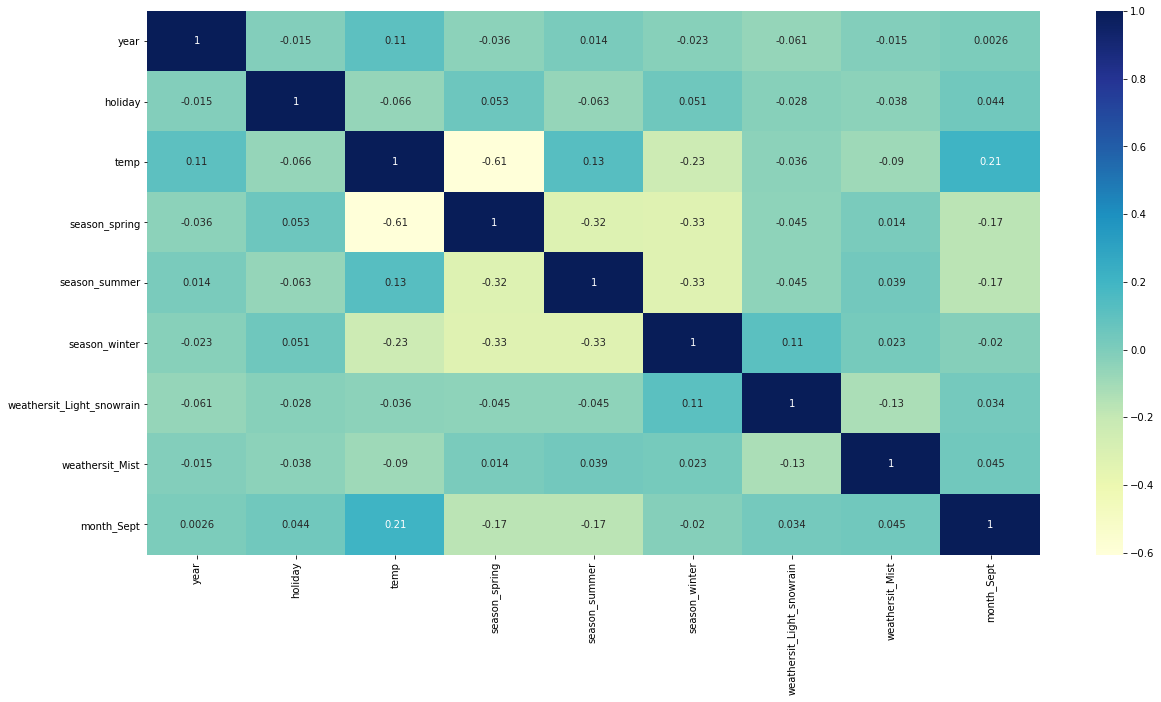

In [53]:
plt.figure(figsize=(20,10))
sns.heatmap(X_train[cols].corr(),annot=True,cmap='YlGnBu')
plt.show()

Model 7 seems to be good as all the p values seem to be significant and the VIF values are below 3.

F-statistic is also very high indicating the  overall model fit is significant and also the R-sqaured and adjusted R-squared values are high and the differnce between them is very low.

### Final Model

In [54]:
X_train=X_train[cols]
lr=LinearRegression()
lr=lr.fit(X_train,y_train)
print(lr.intercept_)
print(lr.coef_)

0.14151309255199762
[ 0.23309107 -0.09965391  0.4900469  -0.06446607  0.05123169  0.09712338
 -0.30076531 -0.0783898   0.09535149]


# Model Evaluation

#### a. Residual Analysis

In [55]:
y_train_pred=lr.predict(X_train)

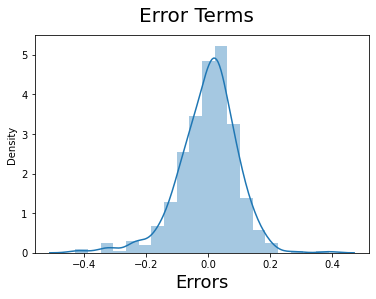

In [56]:
#plotting histogram of the error terms to check whether the error terms are normally distributed or not.
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

We can see that the error terms are normally ditributed with mean 0.

Let us check whether the error terms are independent or not



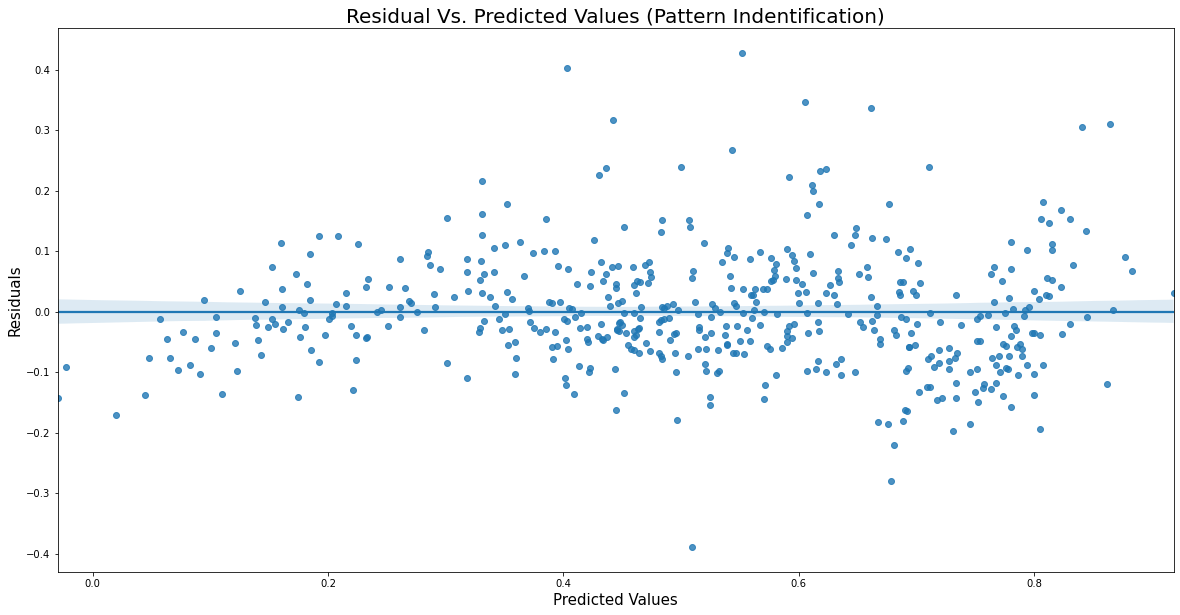

In [57]:
plt.figure(figsize=(20,10))
residual=y_train_pred-y_train
sns.regplot(x=y_train_pred, y=residual)
plt.title('Residual Vs. Predicted Values (Pattern Indentification)', fontdict={'fontsize': 20})
plt.xlabel('Predicted Values', fontdict={'fontsize': 15})
plt.ylabel('Residuals', fontdict={'fontsize': 15})
plt.show()

We can see that there is no relationship between the error terms and the target variable indicating that the error terms are independent

<Figure size 1008x360 with 0 Axes>

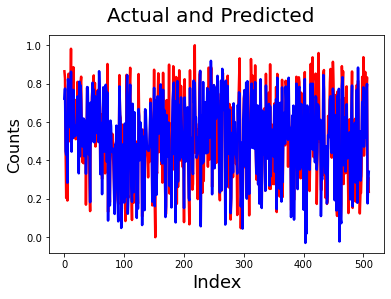

In [58]:
#Actual vs Predicted
plt.figure(figsize=(14,5))
c = [i for i in range(0,len(X_train),1)]
fig = plt.figure()
plt.plot(c,y_train, color="red", linewidth=2.5, linestyle="-")
plt.plot(c,y_train_pred, color="blue",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Counts', fontsize=16)                               # Y-label
plt.show()

We see that the actual and the predicted values are following the same pattern

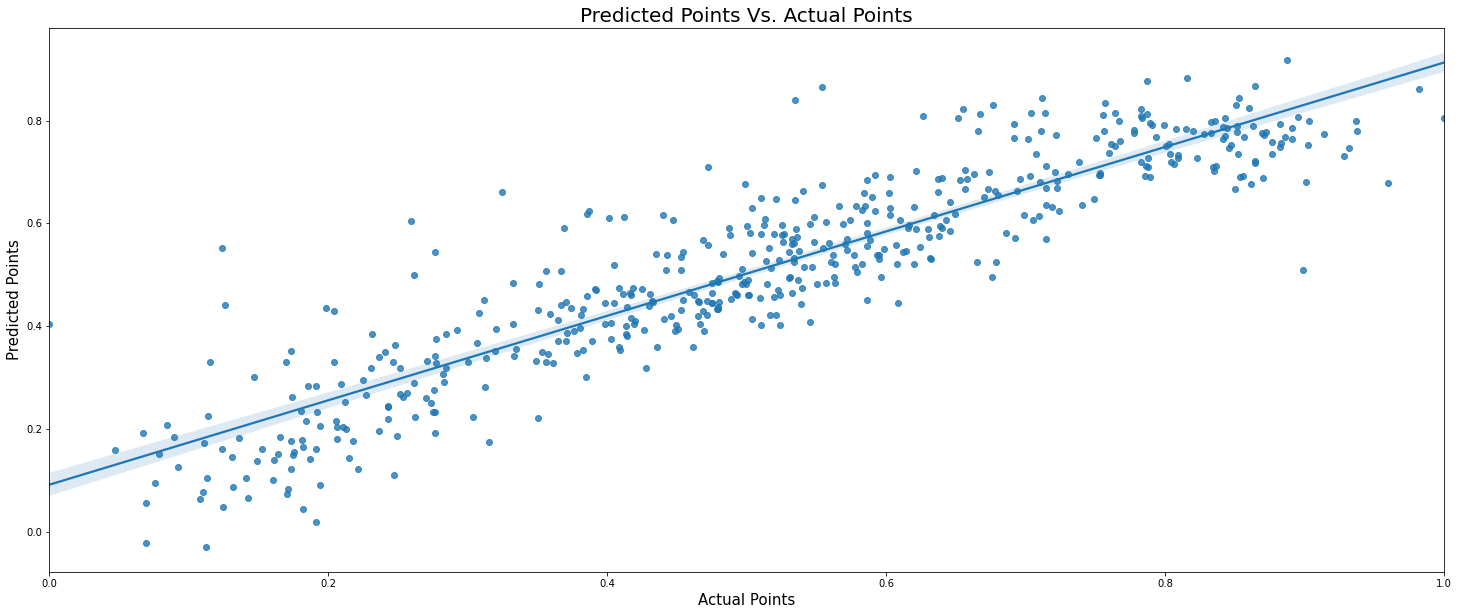

In [59]:
#verifying homoscedasticity
plt.figure(figsize=(25,10))
sns.regplot(x=y_train, y=y_train_pred)
plt.title('Predicted Points Vs. Actual Points', fontdict={'fontsize': 20})
plt.xlabel('Actual Points', fontdict={'fontsize': 15})
plt.ylabel('Predicted Points', fontdict={'fontsize': 15})
plt.show()

From the above plot,we can observe variance of error terms is equal. There is neither high nor low concentration of error terms in a particular region.

### Evaluation

In [60]:
r2_train=r2_score(y_train,y_train_pred)
r2_train

0.8216889627076686

R sqaured seems to be fair enough for the model indicating the model is a good fit.


In [61]:
adjusted_r2_train = round(1-(1-r2_train)*(X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1),4)
adjusted_r2_train

0.8185

Adjusted r-sqaured value of 81.85% for the training set is good. We can also see that the difference between r-squared and and adjusted r-squared values is very very low indicating less multicolinearity between the predictor variables.

## Making Predictions Using the Final Model

In [62]:
test_data.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,days_old,season_spring,...,month_Nov,month_Oct,month_Sept,month_may,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,184,0,...,0,0,0,0,0,0,0,0,0,1
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,535,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,0,19.270000,22.85230,81.2917,13.250121,2659,299,0,...,0,1,0,0,0,1,0,0,0,0
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,221,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,29.315000,32.19710,30.5000,19.583229,4968,152,0,...,0,0,0,0,0,1,0,0,0,0


In [63]:
numerical_cols=['temp','atemp','windspeed','humidity','count','days_old']
test_data[numerical_cols]=scaler.transform(test_data[numerical_cols])

In [64]:
test_data.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,days_old,season_spring,...,month_Nov,month_Oct,month_Sept,month_may,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.558941,0.532991,0.638508,0.313350,0.520592,0.488704,0.255708,...,0.073059,0.082192,0.086758,0.086758,0.118721,0.173516,0.155251,0.141553,0.123288,0.155251
std,0.500722,0.188034,0.481313,0.233698,0.217888,0.148974,0.159947,0.218435,0.293496,0.437258,...,0.260830,0.275286,0.282125,0.282125,0.324202,0.379560,0.362974,0.349389,0.329520,0.362974
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.004121,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.233516,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.478022,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,0.736951,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.001374,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [65]:
y_test=test_data.pop('count')
X_test=test_data

In [66]:
cols

['year',
 'holiday',
 'temp',
 'season_spring',
 'season_summer',
 'season_winter',
 'weathersit_Light_snowrain',
 'weathersit_Mist',
 'month_Sept']

In [67]:
y_test_pred=lr.predict(X_test[cols])

### Model Evaluation on  Test data

<Figure size 1008x360 with 0 Axes>

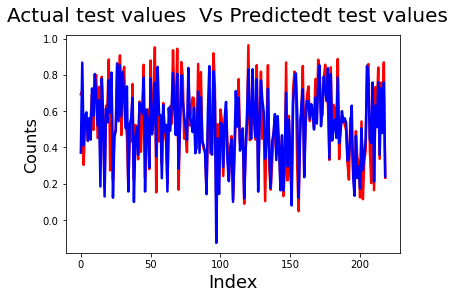

In [68]:
#Let us plot a graph between actual test data and predicted test data
plt.figure(figsize=(14,5))
c = [i for i in range(0,len(X_test),1)]
fig = plt.figure()
plt.plot(c,y_test, color="red", linewidth=2.5, linestyle="-")
plt.plot(c,y_test_pred, color="blue",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual test values  Vs Predictedt test values', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Counts', fontsize=16)                               # Y-label
plt.show()

The actual test values and the predicted test values are almost coinciding and following the same pattern.

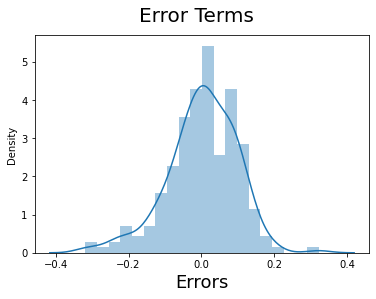

In [69]:
#Let us plot residuals for test data as well
fig = plt.figure()
sns.distplot((y_test - y_test_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

We can see that error terms for test data too are normally distributed with mean 0

#### Calculating R-Square and Adjusted R-Squared for the test data

In [70]:
#R-squared values for test
r2=r2_score(y_test,y_test_pred)
r2

0.8088172921479284

R squared value for the test data is 80.8% which seems to be good indicating that the model is a good fit for the test data as well.


In [71]:
adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7783


Adjusted R-squared value with test data turns out to be 77.83% which is good indicating not much collinearity is present between the predictor variables and also the difference between R-sqaured and the adjusted R-sqaured for the test data is also low

## Inferences

In [72]:
build_model(cols)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     256.0
Date:                Sun, 08 May 2022   Prob (F-statistic):          6.89e-181
Time:                        19:59:39   Log-Likelihood:                 478.19
No. Observations:                 510   AIC:                            -936.4
Df Residuals:                     500   BIC:                            -894.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

#### count =  0.1415 + 0.2331 * year + 0.49 * temp + 0.0512 * season_summer + 0.0971 * season_winter + 0.0954 * month_Sept - 0.0997*                           holiday - 0.0645 * season_spring - 0.3 * weathersit_Light_snowrain - 0.0784 * weathersit_Mist

From the  model, we can infer that:<br>

1.When the temperatures are high, the demand for rental bikes will be high.<br>
2.Company should focus on expanding business during Spring.<br>
3.Based on previous data it is expected to have a increase in number of users once situation comes back to normal, compared to 2019.<br>
4.There would be less demand  when the weather is Light Snowy or Rainy.<br>
Hence when the situation comes back to normal, the company should come up with new offers during spring when the weather is pleasant and also advertise a little for September as this is when business would be at its best.<br>
